In [2]:
df = pd.read_csv('marketing_campaign_data.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
# Checkthe amount of unique value for object datatypes
df.select_dtypes(include='object').nunique()

Education           5
Marital_Status      6
Dt_Customer       663
dtype: int64

In [4]:
# Only extract the year from Dt_Customer column
df['Dt_Customer'] = df['Dt_Customer'].str[-4:]
df['Dt_Customer'] = df['Dt_Customer'].astype(int)

In [5]:
# Drop Unnamed: 0 and ID from table
df.drop(columns=['Unnamed: 0', 'ID'], inplace=True)

In [6]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,S1,Lajang,58138000.0,0,0,2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,S1,Lajang,46344000.0,1,1,2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,S1,Bertunangan,71613000.0,0,0,2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,S1,Bertunangan,26646000.0,1,0,2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,S3,Menikah,58293000.0,1,0,2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


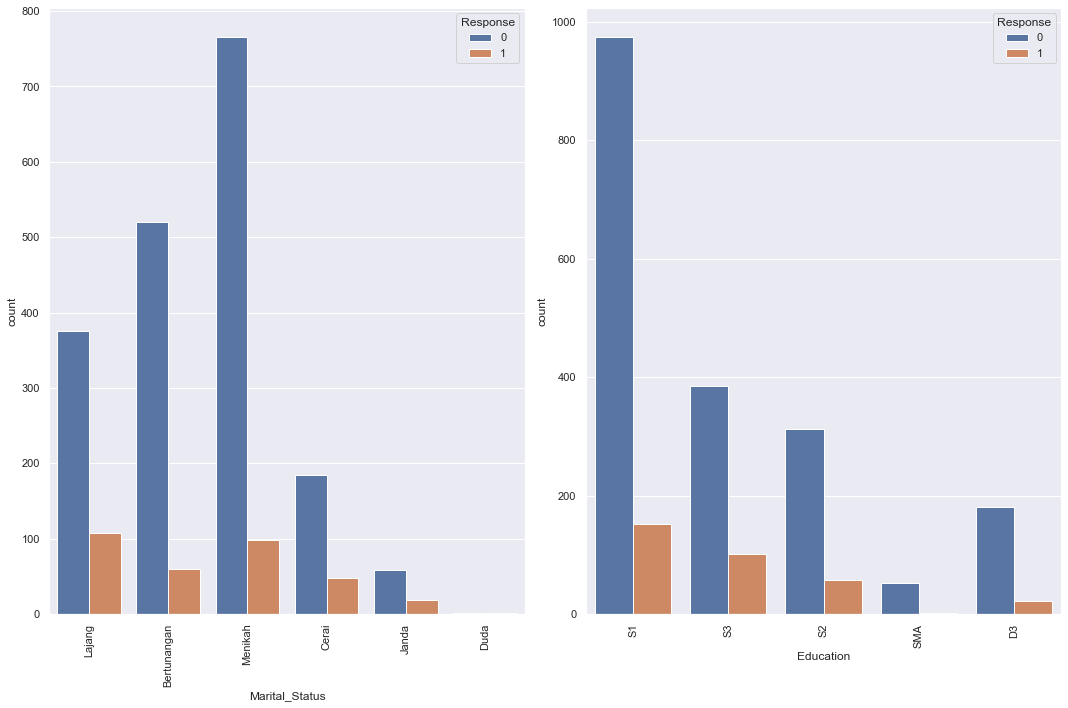

In [7]:
# list of categorical variables to plot
cat_vars = ['Marital_Status', 'Education']

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Response', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

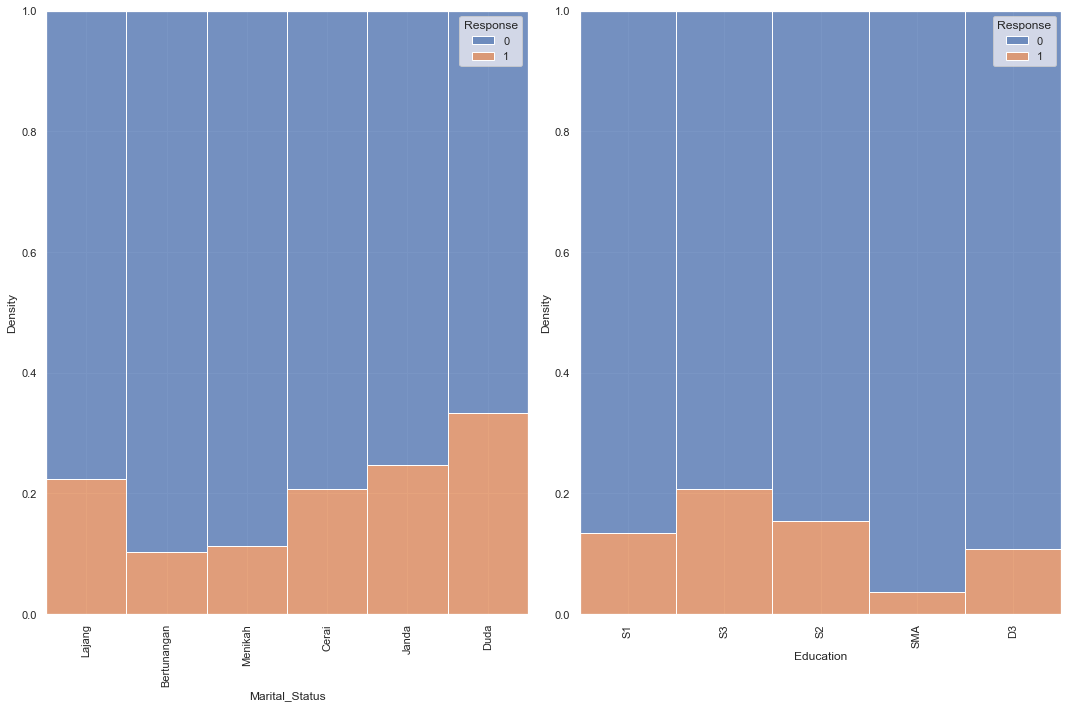

In [8]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['Marital_Status', 'Education']

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='Response', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

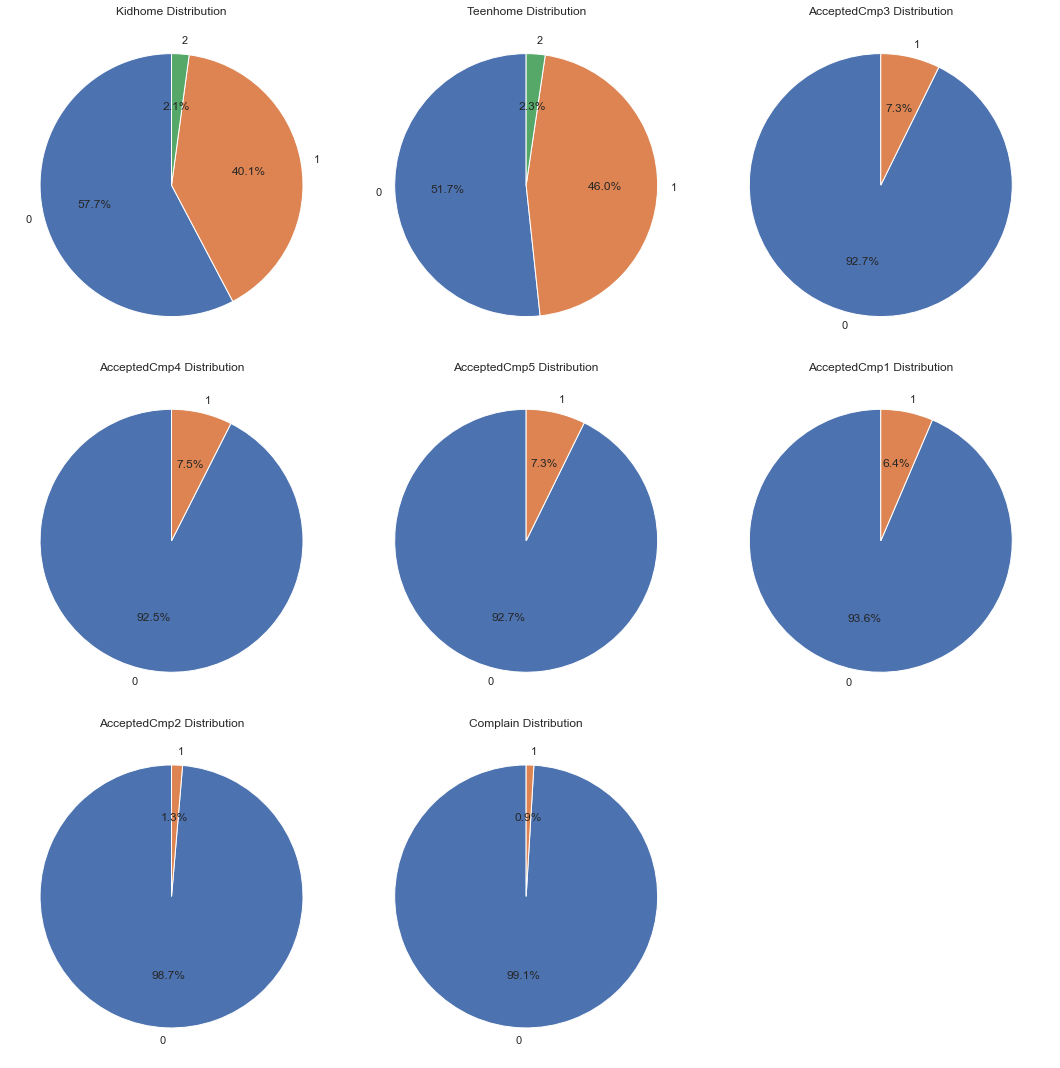

In [9]:
cat_vars = ['Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
            'AcceptedCmp1', 'AcceptedCmp2', 'Complain']

# Create a figure and axes
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Create a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
    if i < len(axs.flat):
        # Count the number of occurrences for each category
        cat_counts = df[var].value_counts()

        # Create a pie chart
        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Set a title for each subplot
        axs.flat[i].set_title(f'{var} Distribution')

# Hide the last subplot
axs.flat[-1].axis('off')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

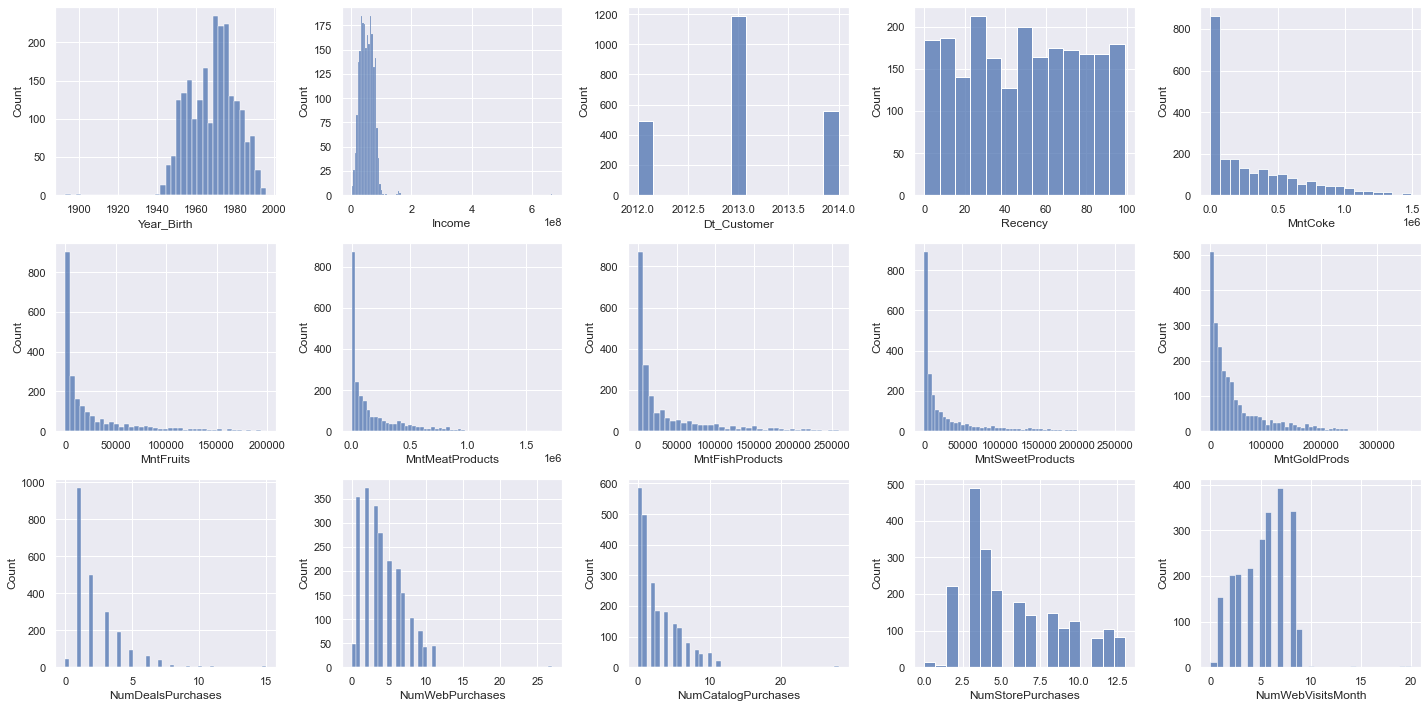

In [10]:
# List of categorical variables to plot
num_vars = ['Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntCoke',
            'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

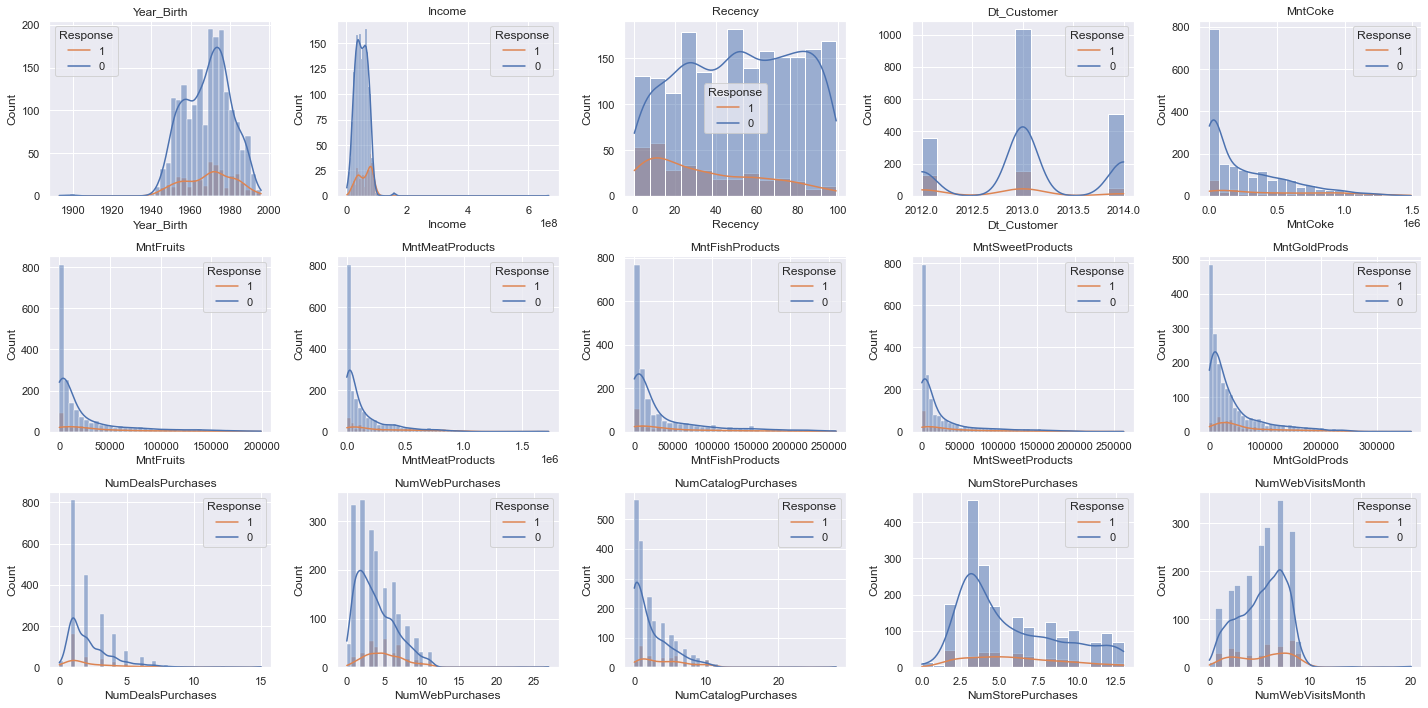

In [11]:
# List of numerical variables to plot
num_vars = ['Year_Birth', 'Income', 'Recency', 'Dt_Customer', 'MntCoke', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth']

# Calculate the number of required rows and columns for subplots
num_cols = 5  # Number of columns for subplots
num_rows = (len(num_vars) + num_cols - 1) // num_cols  # Ceil division

# Create a figure and axes
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 10))
axs = axs.flatten()

# Create histograms for each numerical variable with hue='Response'
for i, var in enumerate(num_vars):
    ax = axs[i]
    sns.histplot(data=df, x=var, hue='Response', kde=True, ax=ax)
    ax.set_title(var)
    ax.legend(title='Response', labels=['1', '0'])  # Manually set legend labels

# Remove any extra empty subplots
if len(num_vars) < len(axs):
    for i in range(len(num_vars), len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

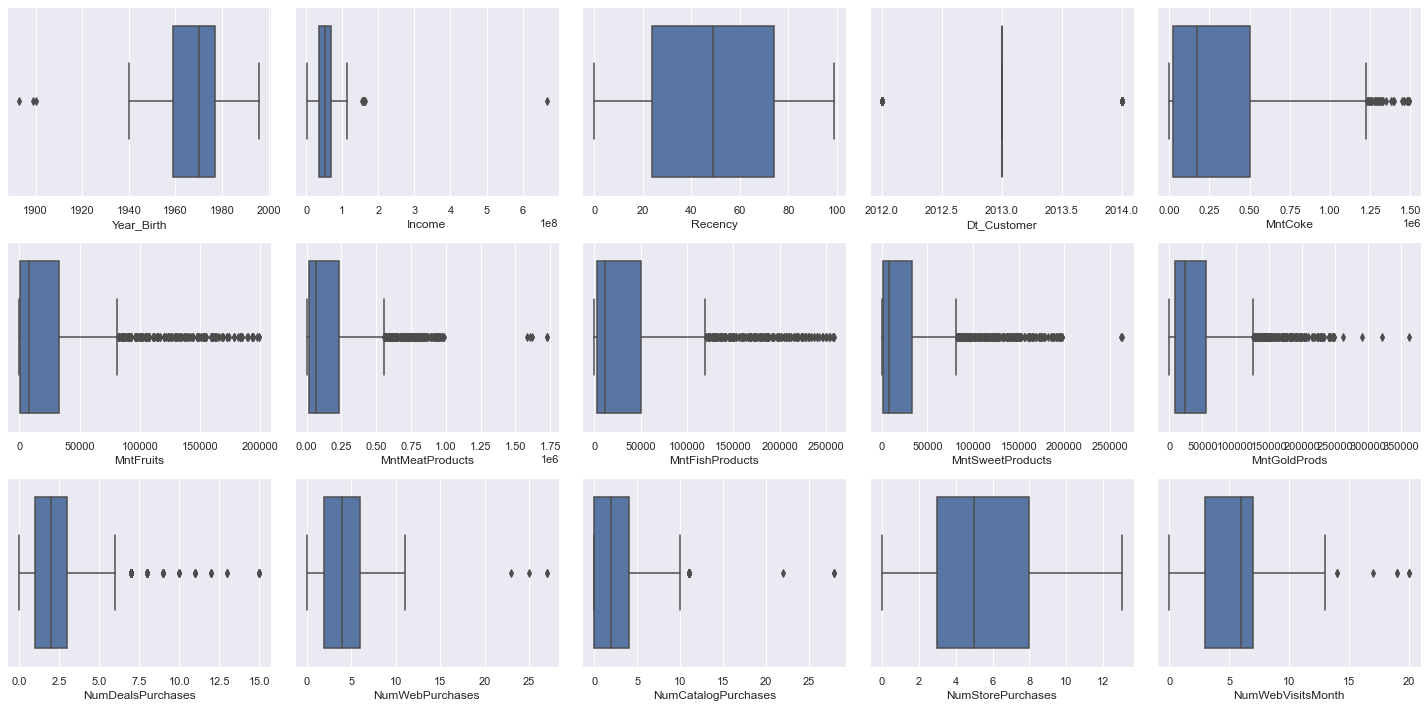

In [12]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'Dt_Customer', 'MntCoke', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

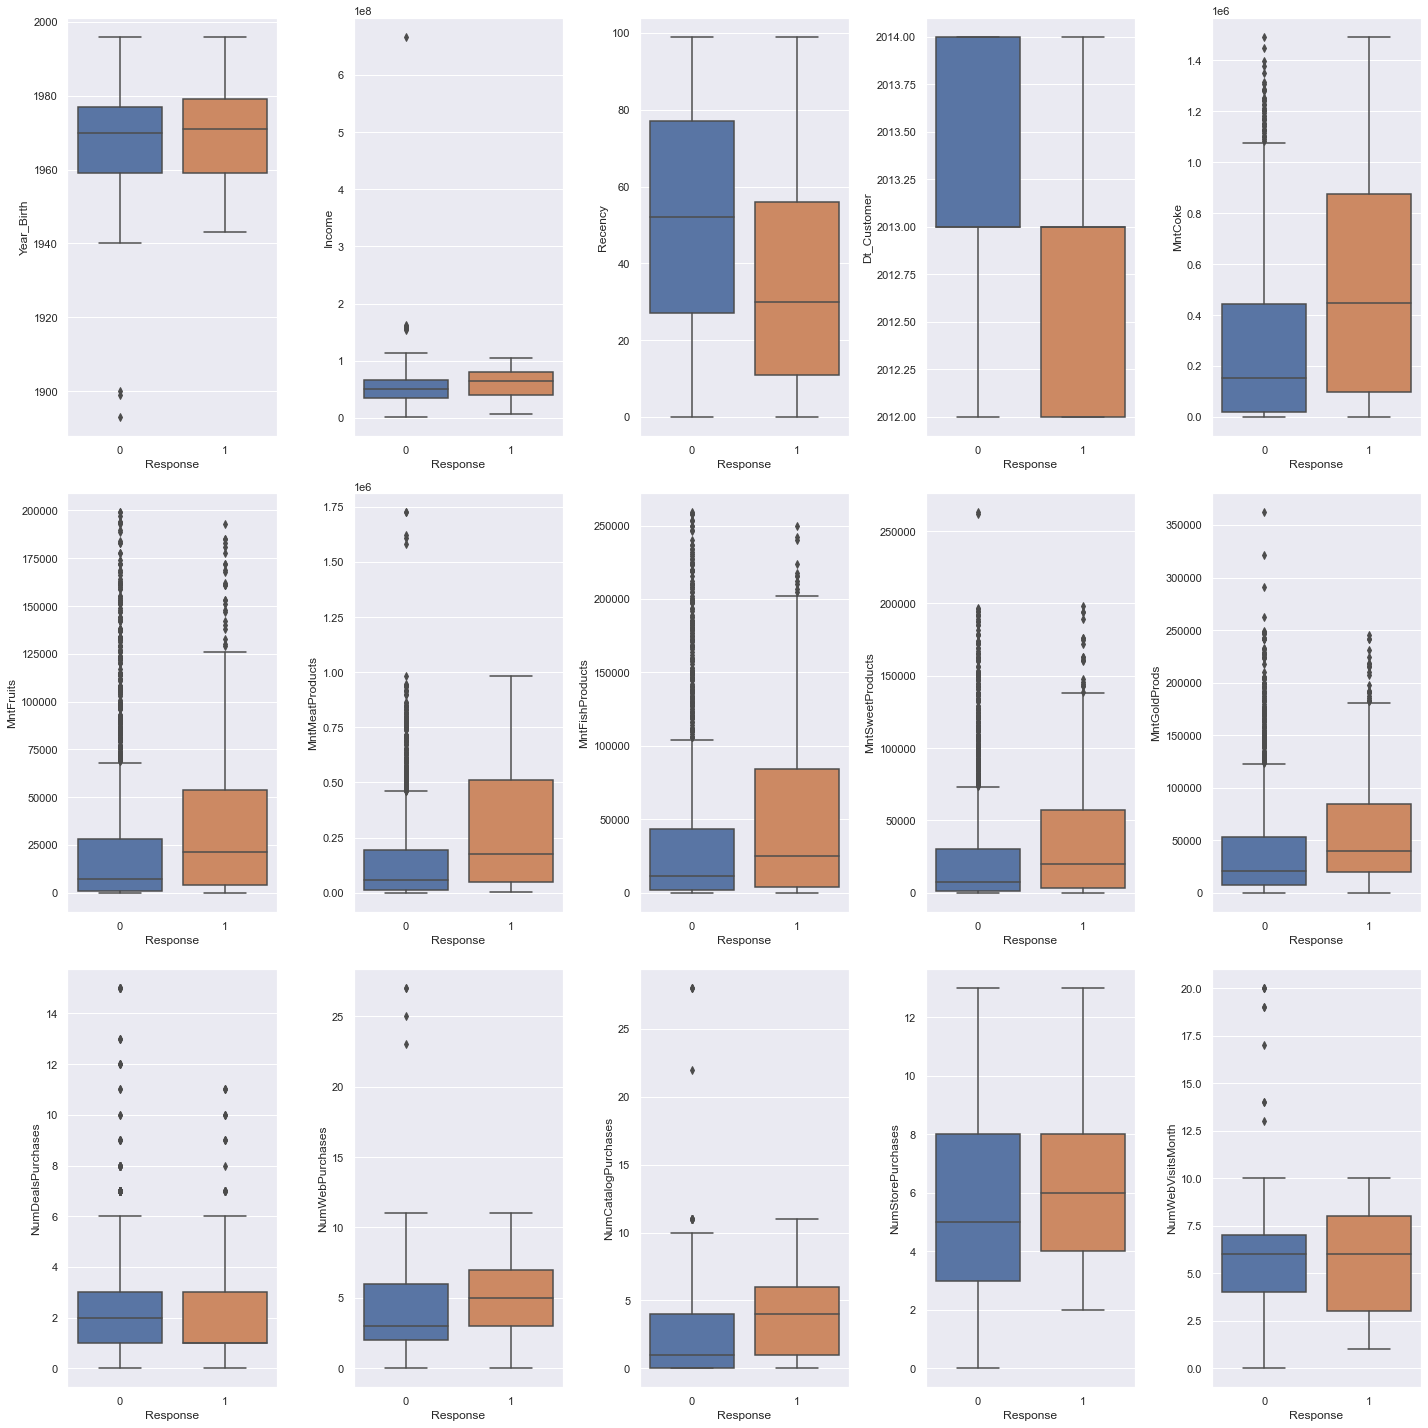

In [13]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'Dt_Customer', 'MntCoke', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Response', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

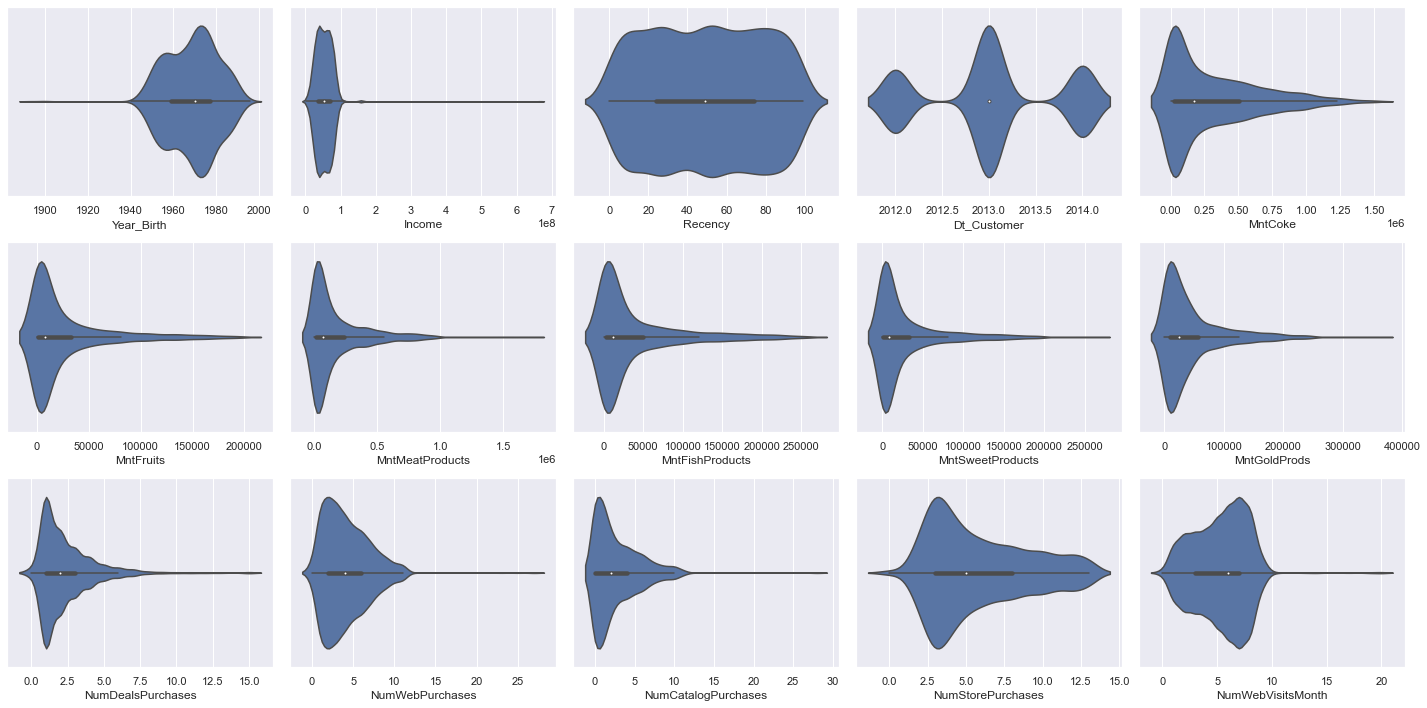

In [14]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'Dt_Customer', 'MntCoke', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

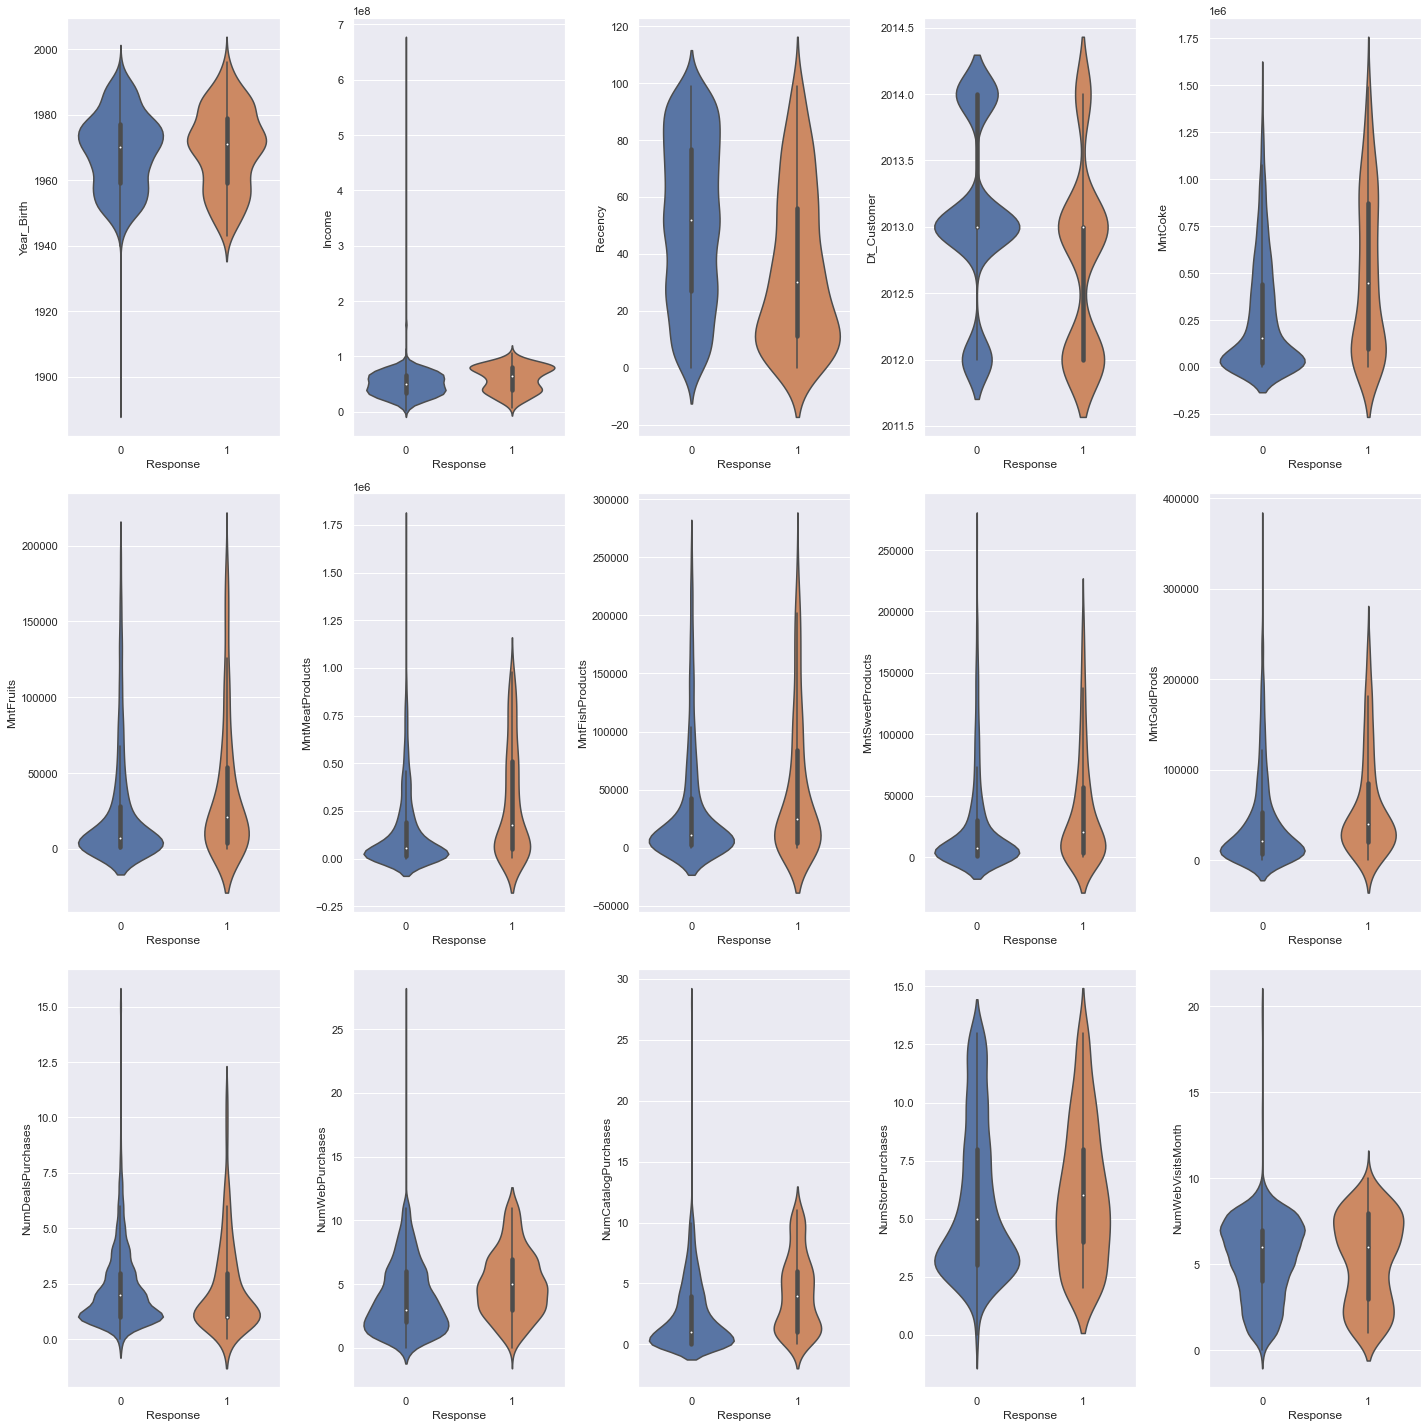

In [15]:
num_vars = ['Year_Birth', 'Income', 'Recency', 'Dt_Customer', 'MntCoke', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth']

fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df, x='Response', ax=axs[i])

fig.tight_layout()

plt.show()

In [16]:
# Filter columns with data type 'int'
int_columns = df.select_dtypes(include='int')


mean_values = int_columns.mean()
std_values = int_columns.std()
min_values = int_columns.min()
q1_values = int_columns.quantile(0.25)
q2_values = int_columns.quantile(0.5)
q3_values = int_columns.quantile(0.75)
iqr_values = q3_values - q1_values
max_values = int_columns.max()
statistics_df = pd.DataFrame({
    'Mean': mean_values,
    'Std': std_values,
    'Min': min_values,
    'Q1': q1_values,
    'Q2 (Median)': q2_values,
    'Q3': q3_values,
    'IQR': iqr_values,
    'Max': max_values
})

statistics_df

,Mean,Std,Min,Q1,Q2 (Median),Q3,IQR,Max
Year_Birth,1968.805804,11.984069,1893,1959.0,1970.0,1977.0,18.0,1996
Kidhome,0.444196,0.538398,0,0.0,0.0,1.0,1.0,2
Teenhome,0.506250,0.544538,0,0.0,0.0,1.0,1.0,2
Dt_Customer,2013.028125,0.684554,2012,2013.0,2013.0,2013.0,0.0,2014
Recency,49.109375,28.962453,0,24.0,49.0,74.0,50.0,99
MntCoke,303935.714286,336597.392605,0,23750.0,173500.0,504250.0,480500.0,1493000
MntFruits,26302.232143,39773.433765,0,1000.0,8000.0,33000.0,32000.0,199000
MntMeatProducts,166950.000000,225715.372512,0,16000.0,67000.0,232000.0,216000.0,1725000
MntFishProducts,37525.446429,54628.979403,0,3000.0,12000.0,50000.0,47000.0,259000
MntSweetProducts,27062.946429,41280.498488,0,1000.0,8000.0,33000.0,32000.0,263000


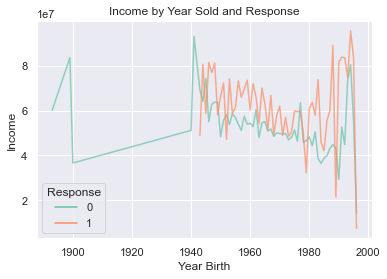

In [17]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Year_Birth', y='Income', hue='Response', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Income by Year Sold and Response")
plt.xlabel("Year Birth")
plt.ylabel("Income")

plt.show()

In [18]:
# Checkthe amount of unique value for integer datatypes
df.select_dtypes(include='int').nunique()

Year_Birth              59
Kidhome                  3
Teenhome                 3
Dt_Customer              3
Recency                100
MntCoke                776
MntFruits              158
MntMeatProducts        558
MntFishProducts        182
MntSweetProducts       177
MntGoldProds           213
NumDealsPurchases       15
NumWebPurchases         15
NumCatalogPurchases     14
NumStorePurchases       14
NumWebVisitsMonth       16
AcceptedCmp3             2
AcceptedCmp4             2
AcceptedCmp5             2
AcceptedCmp1             2
AcceptedCmp2             2
Complain                 2
Z_CostContact            1
Z_Revenue                1
Response                 2
dtype: int64

In [19]:
# Drop Z_CostContact and Z_Revenue becuase only have 1 datatype
df.drop(columns=['Z_CostContact', 'Z_Revenue'], inplace=True)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,S1,Lajang,58138000.0,0,0,2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,S1,Lajang,46344000.0,1,1,2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,S1,Bertunangan,71613000.0,0,0,2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,S1,Bertunangan,26646000.0,1,0,2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,S3,Menikah,58293000.0,1,0,2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,0


In [20]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Income    1.071429
dtype: float64

In [21]:
df.shape

(2240, 26)

In [22]:
# Drop missing value becuase only 1%
df.dropna(inplace=True)
df.shape

(2216, 26)

In [23]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Education: ['S1' 'S3' 'S2' 'SMA' 'D3']
Marital_Status: ['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']


In [24]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Education: [1 3 2 4 0]
Marital_Status: [4 0 5 1 3 2]


<AxesSubplot:>

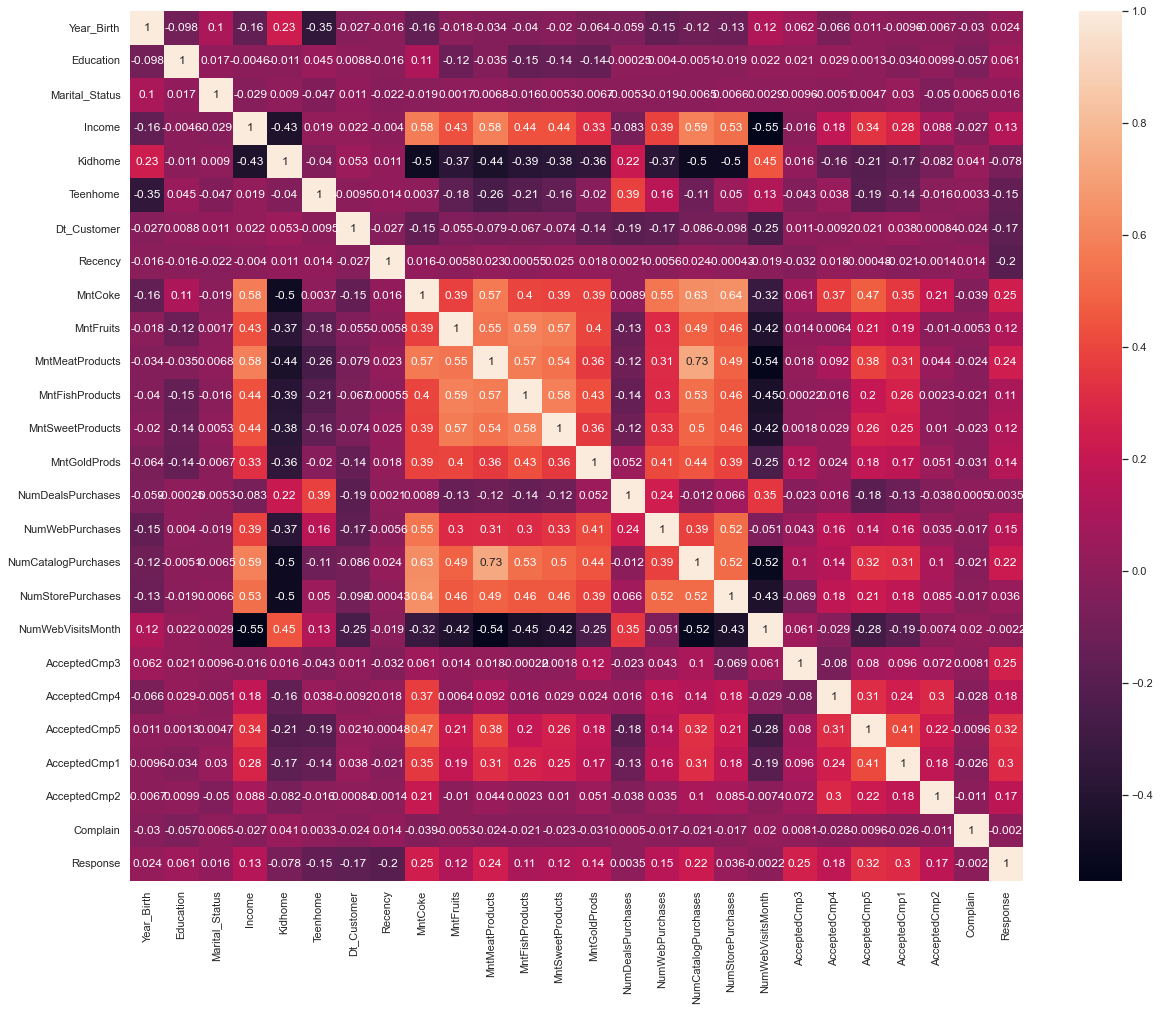

In [25]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [26]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('Response', axis=1)
y = df['Response']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Year_Birth', 'Income', 'MntCoke', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
                    'NumCatalogPurchases', 'NumWebVisitsMonth']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 0}


In [29]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=4, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=4, random_state=0)

In [30]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 72.75 %


In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.7274774774774775
Precision Score :  0.7274774774774775
Recall Score :  0.7274774774774775
Jaccard Score :  0.5716814159292035
Log Loss :  9.822707342529675


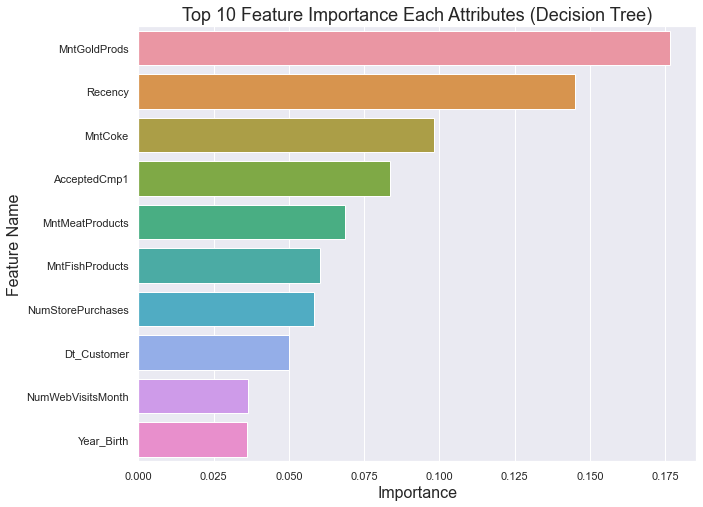

In [32]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

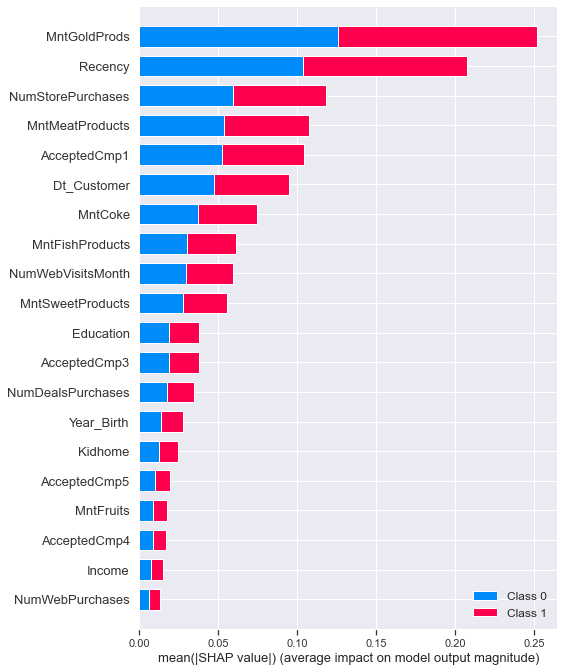

In [34]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

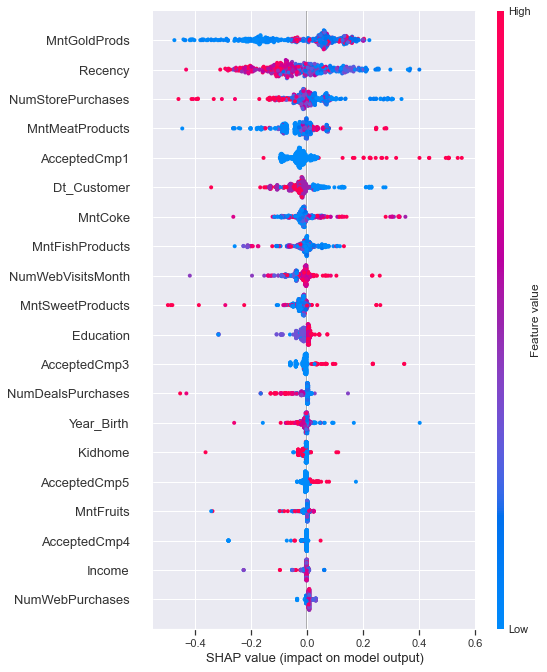

In [35]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.7274774774774775')

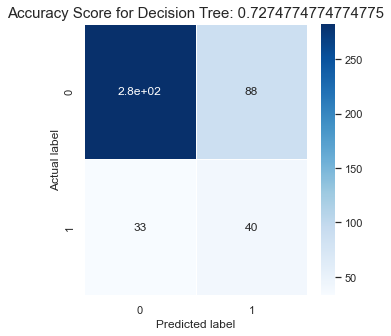

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

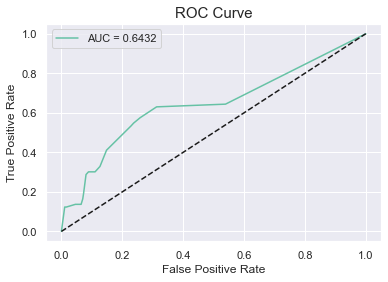

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 0}


In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=10, max_features='sqrt', n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=0)

In [40]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 85.81 %


In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8581081081081081
Precision Score :  0.8581081081081081
Recall Score :  0.8581081081081081
Jaccard Score :  0.7514792899408284
Log Loss :  5.114302170077434


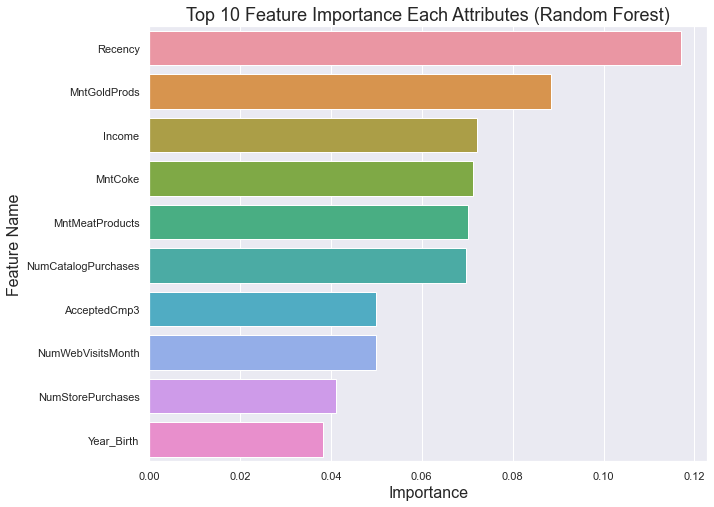

In [42]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

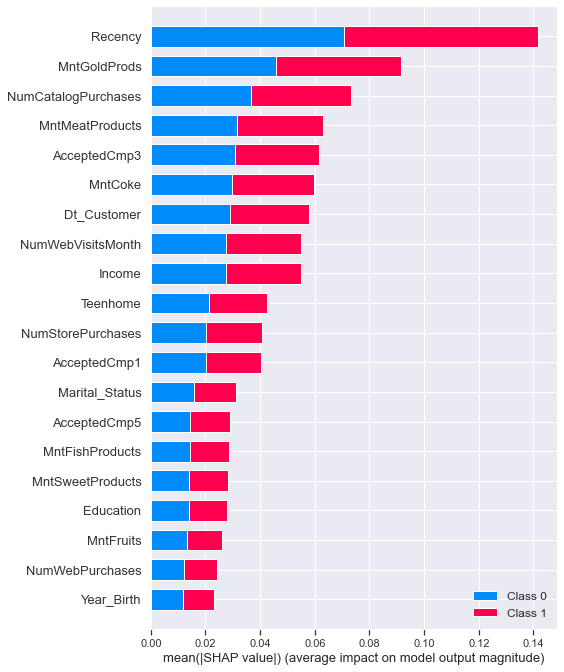

In [44]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

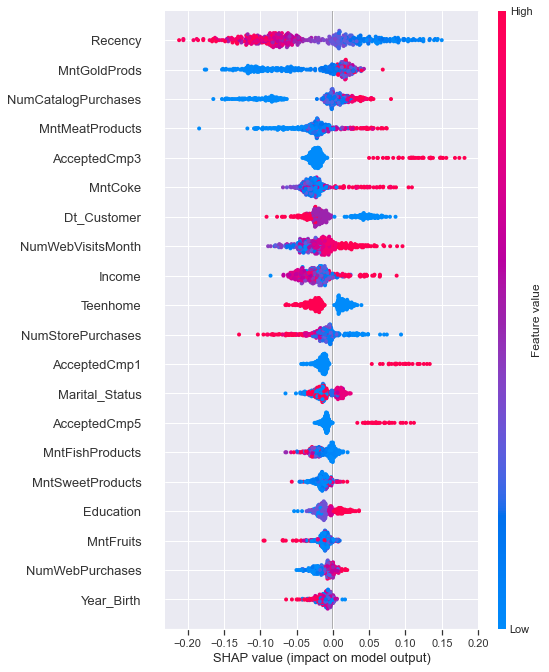

In [45]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8581081081081081')

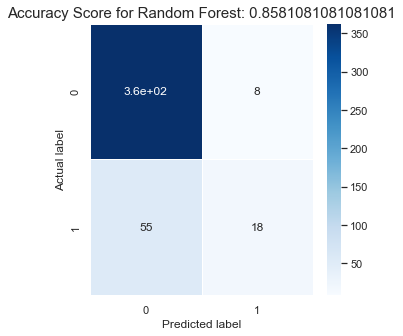

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

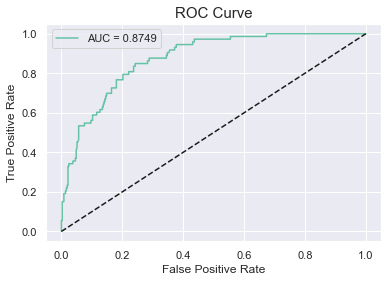

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [48]:
df2 = pd.read_csv('marketing_campaign_data.csv')
df2.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [49]:
# Drop missing value becuase only 1%
df2.dropna(inplace=True)

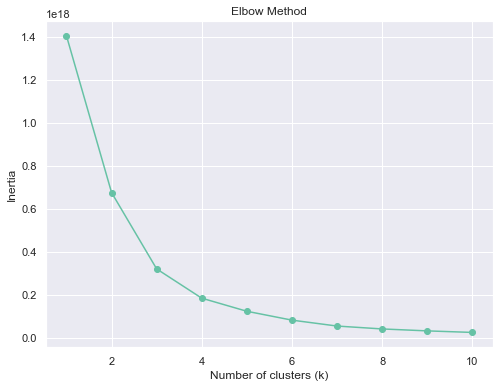

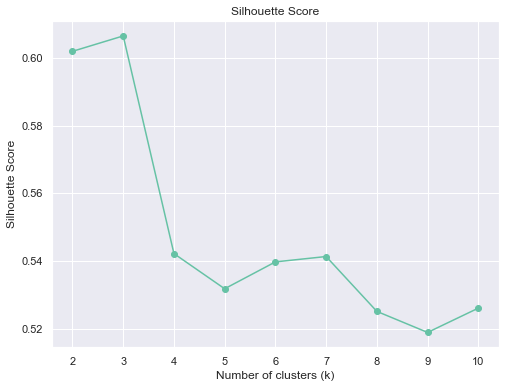

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to find optimal k using the Elbow Method
def find_optimal_k_elbow(X, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Plot Elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

# Function to find optimal k using the Silhouette Score
def find_optimal_k_silhouette(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X, labels))

    # Plot Silhouette Score graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score')
    plt.show()

selected_columns = ['Income', 'Year_Birth', 'Recency']
X = df2[selected_columns]

# Mencari nilai k optimal menggunakan Elbow Method
max_k = 10  
find_optimal_k_elbow(X, max_k)

# Mencari nilai k optimal menggunakan Silhouette Score
find_optimal_k_silhouette(X, max_k)

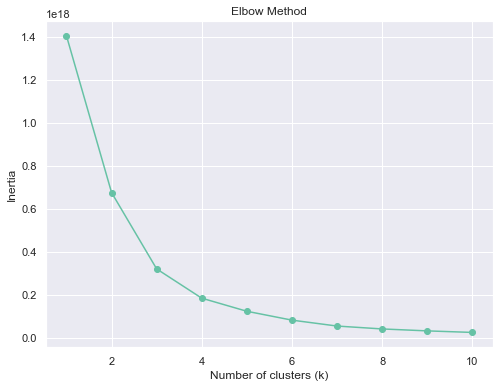

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,label
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,88000,546000,172000,88000,88000,3,8,10,4,7,0,0,0,0,0,0,3,11,1,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,1000,6000,2000,1000,6000,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,49000,127000,111000,21000,42000,1,8,2,10,4,0,0,0,0,0,0,3,11,0,1
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,4000,20000,10000,3000,5000,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,43000,118000,46000,27000,15000,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,10870,1967,S1,Menikah,61223000.0,0,1,13-06-2013,46,709000,43000,182000,42000,118000,247000,2,9,3,4,5,0,0,0,0,0,0,3,11,0,1
2236,2236,4001,1946,S3,Bertunangan,64014000.0,2,1,10-06-2014,56,406000,0,30000,0,0,8000,7,8,2,5,7,0,0,0,1,0,0,3,11,0,1
2237,2237,7270,1981,S1,Cerai,56981000.0,0,0,25-01-2014,91,908000,48000,217000,32000,12000,24000,1,2,3,13,6,0,1,0,0,0,0,3,11,0,1
2238,2238,8235,1956,S2,Bertunangan,69245000.0,0,1,24-01-2014,8,428000,30000,214000,80000,30000,61000,2,6,5,10,3,0,0,0,0,0,0,3,11,0,1


In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to find optimal k using the Elbow Method
def find_optimal_k_elbow(X, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Plot Elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

    # Return the fitted KMeans model with optimal k
    optimal_k = np.argmin(np.diff(inertias)) + 2
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(X)
    return kmeans

# Function to find optimal k using the Silhouette Score
def find_optimal_k_silhouette(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X, labels))

    # Plot Silhouette Score graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score')
    plt.show()

    # Return the fitted KMeans model with optimal k
    optimal_k = np.argmax(silhouette_scores) + 2
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(X)
    return kmeans


selected_columns = ['Income', 'Year_Birth', 'Recency']
X = df2[selected_columns]

# Mencari nilai k optimal menggunakan Elbow Method
max_k = 10  
kmeans_model = find_optimal_k_elbow(X, max_k)

# Predict cluster labels and add 'label' column to the DataFrame
df2['label'] = kmeans_model.predict(X)

df2


In [52]:
df2.shape

(2216, 31)

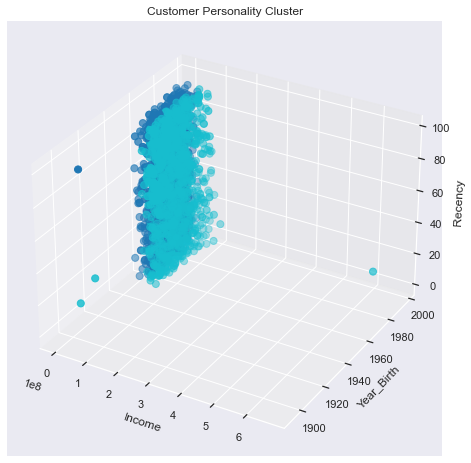

In [53]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Visualization of the Clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a colormap for the clusters
colors = plt.cm.tab10(df2['label'] / float(max(df2['label'])))

# Plot the data points
ax.scatter(df2['Income'], df2['Year_Birth'], df2['Recency'], c=colors, s=50)

# Set labels for the axes
ax.set_xlabel('Income')
ax.set_ylabel('Year_Birth')
ax.set_zlabel('Recency')

# Set the title
ax.set_title('Customer Personality Cluster')

plt.show()